# Le pendule

!["Schema du Pendule"](SchemaPendule.png)

## Approximation des petits angles

On considère le pendule simple de la figure ci-dessus, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

Résolvez cette équation linéarisée ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et tracez **sur un même graphe** l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Conditions initiales
theta_0 = np.pi/18      # pi / 18 = 10°
q_1 = 1 #s^-1
q_2 = 2 #s^-1
q_3 = 5 #s^-1
omega = 1 #rad/s
ordre = 2

# Paramètres
ti = 0       # s
te = 20      # s  
dt = 0.05    # s  # pas

In [6]:
# On définit trois fonctions représentant les dérivées pour les trois valeurs de q

def derivee_theta_1(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = -(omega**2 * u[0]) - (q_1 * u[1])
        return du
    
def derivee_theta_2(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = -(omega**2 * u[0]) - (q_2 * u[1])
        return du 
    
def derivee_theta_3(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = -(omega**2 * u[0]) - (q_3 * u[1])    
        return du    

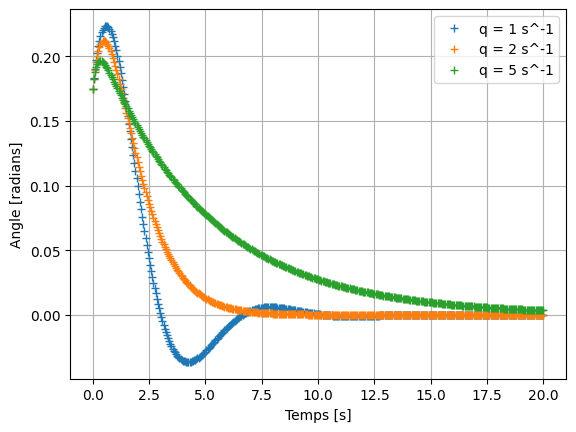

In [7]:
# On applique la méthode rk4 pour nos trois valeurs de q différente

def rk4_1(ti, te, dt, theta_0, derivee_theta_1, ordre):
 
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0
    
    for i in range(num_points - 1):
        d1 = derivee_theta_1(u[:, i], t[i])
        d2 = derivee_theta_1(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_1(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_1(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u


        
def rk4_2(ti, te, dt, theta_0, derivee_theta_2, ordre):        
    
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0

    for i in range(num_points - 1):
        d1 = derivee_theta_2(u[:, i], t[i])
        d2 = derivee_theta_2(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_2(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_2(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u


    
def rk4_3(ti, te, dt, theta_0, derivee_theta_3, ordre):        
    
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
   
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0

    for i in range(num_points - 1):
        d1 = derivee_theta_3(u[:, i], t[i])
        d2 = derivee_theta_3(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_3(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_3(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u

# Méthode rk4

t, Drk4_1 = rk4_1(ti, te, dt, theta_0, derivee_theta_1, ordre)
t, Drk4_2 = rk4_2(ti, te, dt, theta_0, derivee_theta_2, ordre)
t, Drk4_3 = rk4_3(ti, te, dt, theta_0, derivee_theta_3, ordre)


plt.plot(t, Drk4_1[0, :], '+', label = 'q = 1 s^-1')
plt.plot(t, Drk4_2[0, :], '+', label = 'q = 2 s^-1')
plt.plot(t, Drk4_3[0, :], '+', label = 'q = 5 s^-1')
plt.xlabel('Temps [s]')
plt.ylabel('Angle [radians]')
plt.legend()
plt.grid()
plt.show()

## Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Résolvez cette nouvelle équation avec la méthode RK4 pour une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.

Tracez **sur un même graphe** la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Commentez la forme des trajectoires que vous observez.

In [8]:
# Conditions initiales 
F_e = 1 #rad/s^2
omega_e = (2 * omega) /3 # rad/s
q_0 = 0 

In [12]:
# On définit trois fonctions représentant les dérivées pour les trois valeurs de q

    
def derivee_theta_0(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (0)-(omega**2 * u[0]) - (q_0 * u[1])    
        return du 

def derivee_theta_1b(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (0)-(omega**2 * u[0]) - (q_1 * u[1])
        return du
    
def derivee_theta_2b(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (F_e * np.sin(omega_e))-(omega**2 * u[0]) - (q_1 * u[1])
        return du 

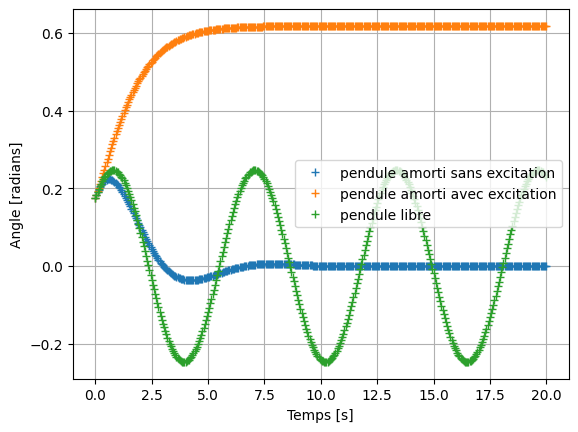

In [19]:
# On applique la méthode rk4 pour nos trois valeurs de q différente
def rk4_0(ti, te, dt, theta_0, derivee_theta_0, ordre):        
    
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
   
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0

    for i in range(num_points - 1):
        d1 = derivee_theta_0(u[:, i], t[i])
        d2 = derivee_theta_0(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_0(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_0(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u

def rk4_1b(ti, te, dt, theta_0, derivee_theta_1b, ordre):
 
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0
    
    for i in range(num_points - 1):
        d1 = derivee_theta_1b(u[:, i], t[i])
        d2 = derivee_theta_1b(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_1b(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_1b(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u


        
def rk4_2b(ti, te, dt, theta_0, derivee_theta_2b, ordre):        
    
    interval = te - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    u = np.empty((ordre, num_points))

    u[:,0] = theta_0

    for i in range(num_points - 1):
        d1 = derivee_theta_2b(u[:, i], t[i])
        d2 = derivee_theta_2b(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_2b(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_2b(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u


    


# Méthode rk4

t, Drk4_0 = rk4_0(ti, te, dt, theta_0, derivee_theta_0, ordre)
t, Drk4_1b = rk4_1b(ti, te, dt, theta_0, derivee_theta_1b, ordre)
t, Drk4_2b = rk4_2b(ti, te, dt, theta_0, derivee_theta_2b, ordre)


plt.plot(t, Drk4_1b[0, :], '+', label = 'pendule amorti sans excitation')
plt.plot(t, Drk4_2b[0, :], '+', label = 'pendule amorti avec excitation')
plt.plot(t, Drk4_0[0, :], '+', label = 'pendule libre')
plt.xlabel('Temps [s]')
plt.ylabel('Angle [radians]')
plt.legend()
plt.grid()
plt.show()

On observe que nous avons deux trajectoires similaires mais une tend vers 0 (celle où le pendule est amorti sans excitation) quant à l'autre elle tend vers0.6 (celle où le pendule est amorti avec excitation) enfin la courbe représentant le pendule libre oscille sinusoïdalement entre environ 0.25 radians et - 0.25 radians.

## Mouvement chaotique

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

Résolvez l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Tracez $\theta(t)$ sur un temps de $100\mathrm{~s}$.

Ajoutez deux tests `if` dans la boucle après l'appel à rk4 pour maintenir l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$.

Que constatez-vous au sujet de la période du pendule ? (Attention, périodique $\neq$ sinusoïdal...)

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

In [20]:
# Conditions initiales 
q = 0.5 #s^-1
tf = 100 #s
F_e_a = 1.4 #rad/s^2
F_e_b = 1.44 #rad/s^2
F_e_c = 1.465 #rad/s^2
F_e_d = 1.5 #rad/s^2

In [21]:
# On définit quatres fonctions représentant les dérivées pour les quatres valeurs de Fe

    
def derivee_theta_a(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (F_e_a * np.sin(omega_e))-(omega**2 * u[0]) - (q_0 * u[1])    
        return du 

def derivee_theta_b(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (F_e_b * np.sin(omega_e))-(omega**2 * u[0]) - (q_1 * u[1])
        return du
    
def derivee_theta_c(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (F_e_c * np.sin(omega_e))-(omega**2 * u[0]) - (q_1 * u[1])
        return du 
    
def derivee_theta_d(u, t):
        du = np.empty(u.shape)
        du[0] = u[1]
        du[1] = (F_e_d * np.sin(omega_e))-(omega**2 * u[0]) - (q_1 * u[1])
        return du 

In [29]:
# On applique la méthode rk4 pour nos quatres valeurs de Fe différentes
def rk4_a(ti, te, dt, theta_0, derivee_theta_a, ordre):        
    
    interval = tf - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
   
    u = np.empty((ordre, num_points))

    u[:,0] = 0

    for i in range(num_points - 1):
        d1 = derivee_theta_a(u[:, i], t[i])
        d2 = derivee_theta_a(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_a(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_a(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u

def rk4_b(ti, te, dt, theta_0, derivee_theta_b, ordre):
 
    interval = tf - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    
    u = np.empty((ordre, num_points))

    u[:,0] = 0
    
    for i in range(num_points - 1):
        d1 = derivee_theta_b(u[:, i], t[i])
        d2 = derivee_theta_b(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_b(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_b(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u


        
def rk4_c(ti, te, dt, theta_0, derivee_theta_c, ordre):        
    
    interval = tf - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    u = np.empty((ordre, num_points))

    u[:,0] = 0

    for i in range(num_points - 1):
        d1 = derivee_theta_c(u[:, i], t[i])
        d2 = derivee_theta_c(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_c(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_c(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u
        
def rk4_d(ti, te, dt, theta_0, derivee_theta_d, ordre):        
    
    interval = tf - ti
    num_points = int(interval / dt) + 1
    t = np. linspace(ti, te, num_points)
    u = np.empty((ordre, num_points))

    u[:,0] = 0

    for i in range(num_points - 1):
        d1 = derivee_theta_d(u[:, i], t[i])
        d2 = derivee_theta_d(u[:, i] + dt / 2 * d1, t[i] + dt / 2)
        d3 = derivee_theta_d(u[:, i] + dt / 2 * d2, t[i] + dt / 2)
        d4 = derivee_theta_d(u[:, i] + dt * d3, t[i] + dt)
        u[:, i + 1] = u[:, i] + dt / 6 * (d1 + 2 * d2 + 2 * d3 + d4)
    return t, u

    


# Méthode rk4

t, Drk4_a = rk4_a(ti, tf, dt, theta_0 = 0, derivee_theta_a, ordre)
t, Drk4_b = rk4_b(ti, tf, dt, theta_0 = 0, derivee_theta_b, ordre)
t, Drk4_c = rk4_a(ti, tf, dt, theta_0 = 0, derivee_theta_c, ordre)
t, Drk4_d = rk4_a(ti, tf, dt, theta_0 = 0, derivee_theta_d, ordre)

plt.plot(t, Drk4_a[0, :], '+', label = 'pendule amorti sans excitation')
plt.plot(t, Drk4_b[0, :], '+', label = 'pendule amorti avec excitation')
plt.plot(t, Drk4_c[0, :], '+', label = 'pendule libre')
plt.plot(t, Drk4_d[0, :], '+')
plt.xlabel('Temps [s]')
plt.ylabel('Angle [radians]')
plt.legend()
plt.grid()
plt.show()

SyntaxError: positional argument follows keyword argument (1763966117.py, line 79)